In [39]:
import tensorflow as tf
import keras as K

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image

In [41]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [42]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [43]:
# Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [44]:
# Terceira Camada de Convolução
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [45]:
classifier.add(Flatten())

In [46]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [47]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


In [49]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('test_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [50]:
def custom_generator(generator):
    while True:
        data = next(generator)
        yield data

repeating_training_set = custom_generator(training_set)

classifier.fit_generator(repeating_training_set, 
                         steps_per_epoch=100, 
                         epochs=5, 
                         validation_data=validation_set, 
                         validation_steps=25)

Epoch 1/5


C:\Users\andre\AppData\Local\Temp\ipykernel_29308\4241428524.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(repeating_training_set,


100/100 [==============================] - 10s 90ms/step - loss: 0.4304 - accuracy: 0.7831 - val_loss: 0.4591 - val_accuracy: 0.8000
Epoch 2/5
100/100 [==============================] - 8s 84ms/step - loss: 0.2008 - accuracy: 0.9217
Epoch 3/5
100/100 [==============================] - 8s 81ms/step - loss: 0.1040 - accuracy: 0.9655
Epoch 4/5
100/100 [==============================] - 8s 78ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 5/5
100/100 [==============================] - 8s 78ms/step - loss: 0.0080 - accuracy: 0.9975


1/1 [==============================] - 0s 96ms/step


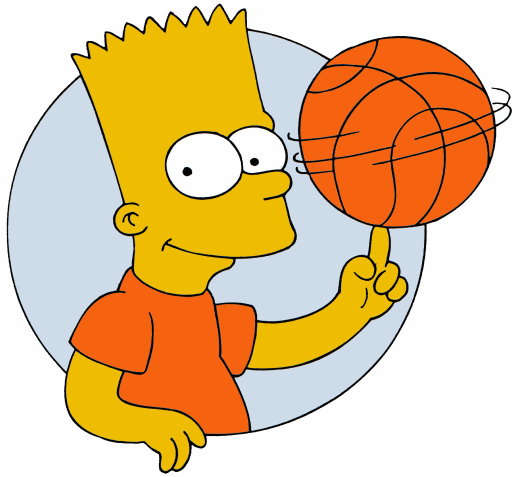

'Bart'

In [51]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/bart/bart17.bmp')
# Convert the image to PNG
img.save('test_set/bart/bart17.png')

test_image = image.load_img('test_set/bart/bart17.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/bart/bart17.png'))
prediction

1/1 [==============================] - 0s 30ms/step


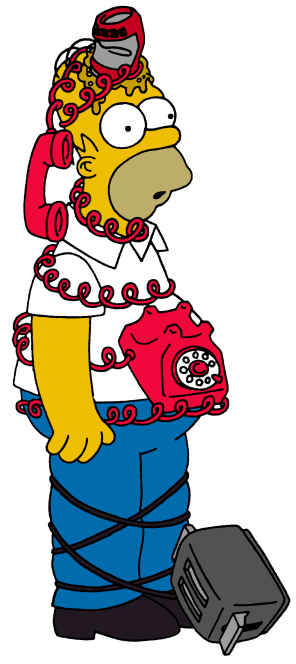

'Homer'

In [52]:
# Segunda Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/homer/homer6.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer6.png')

test_image = image.load_img('test_set/homer/homer6.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer6.png'))
prediction

1/1 [==============================] - 0s 34ms/step


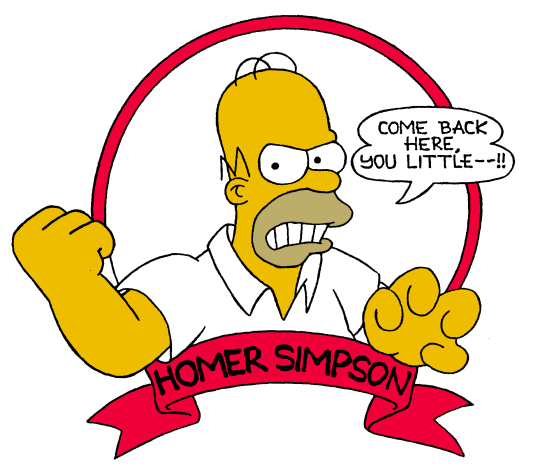

'Homer'

In [53]:
# Terceira Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/homer/homer17.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer17.png')

test_image = image.load_img('test_set/homer/homer17.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer17.png'))
prediction

1/1 [==============================] - 0s 33ms/step


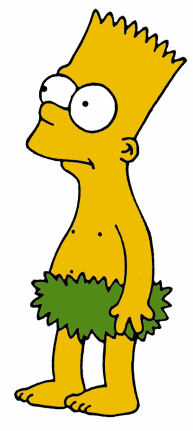

'Bart'

In [54]:
# Quarta Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/bart/bart20.bmp')
# Convert the image to PNG
img.save('test_set/bart/bart20.png')

test_image = image.load_img('test_set/bart/bart20.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/bart/bart20.png'))
prediction

1/1 [==============================] - 0s 30ms/step


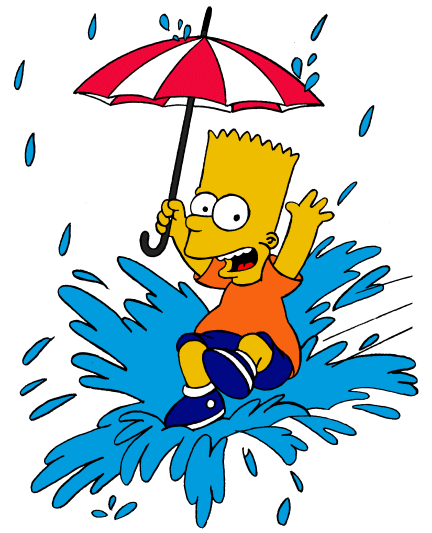

'Bart'

In [55]:
# Quinta Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/bart/bart25.bmp')
# Convert the image to PNG
img.save('test_set/bart/bart25.png')

test_image = image.load_img('test_set/bart/bart25.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/bart/bart25.png'))
prediction

1/1 [==============================] - 0s 37ms/step


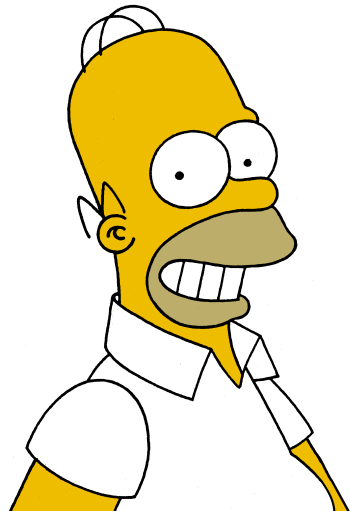

'Homer'

In [56]:
# Sexta Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

from PIL import Image as PilImage

# Open the image file
img = PilImage.open('test_set/homer/homer3.bmp')
# Convert the image to PNG
img.save('test_set/homer/homer3.png')

test_image = image.load_img('test_set/homer/homer3.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

display(Image(filename='test_set/homer/homer3.png'))
prediction

In [57]:
# Evaluate the model
score = classifier.evaluate(validation_set, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6363861560821533
Test accuracy: 0.8941176533699036
